In [20]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.style.use('/Users/summer/desktop/notebook.mplstyle');
%config InlineBackend.figure_format = 'retina'
colors = ["#2078B5", "#FF7F0F", "#2CA12C", "#D72827", "#9467BE", "#8C574B",
            "#E478C2", "#808080", "#BCBE20", "#17BED0", "#AEC8E9", "#FFBC79", 
            "#98E08B", "#FF9896", "#C6B1D6", "#C59D94", "#F8B7D3", "#C8C8C8", 
           "#DCDC8E", "#9EDAE6"]

In [21]:
F = 14
c = 10
b = 10
h = 1
I = 4
J = 8

dt = 0.0001
totstep = 200000
Jmax = 51
Imax = 51

In [22]:
x = np.load('xlisttxt.npy')
y = np.load('ylisttxt.npy')

In [23]:
def lorenz96(xy,i,j):

    xy_dot[i] = (xy[0:I][(i-1)%I] * (xy[0:I][(i+1)%I] - xy[0:I][(i-2)%I]) - xy[0:I][i%I] + F - h*c/b*(np.sum([xy[I::][i::I]])))    
    xy_dot[I+j*I+i] = (c*b*xy[I:][((j+1)%J)*I+i]*(xy[I:][((j-1)%J)*I+i]-xy[I:][((j+2)%J)*I+i])-c*xy[I:][((j)%J)*I+i]+h*c/b*xy[0:I][i])

    #dx[i] = (x[(i-1)%I] * (x[(i+1)%I] - x[(i-2)%I]) - x[i%I] + F - h*c/b*(np.sum([y[jj%J,i] for jj in range(J)])))*dt     
    #dy[j,i] = (c*b*y[(j+1)%J,i]*(y[(j-1)%J,i]-y[(j+2)%J,i])-c*y[(j)%J,i]+h*c/b*x[i])*dt
    #print(i,j,xy_dot)

    return xy_dot

In [24]:
def RK4(xylist,step,i,j):
    
    oldxy = xylist[((I+J*I)*(step-1)):((I+J*I)*(step))]

    k1 = dt*lorenz96(oldxy,i,j)
    k2 = dt*lorenz96(oldxy + k1*0.5*dt,i,j)
    k3 = dt*lorenz96(oldxy + k2*0.5*dt,i,j)
    k4 = dt*lorenz96(oldxy + k3*dt,i,j)

    return oldxy + (k1 + 2*k2 + 2*k3 + k4)/6

In [25]:
#x = np.random.rand(I)
#y = np.random.rand(J,I)
xylist = np.zeros([(totstep)*(I+J*I)])
s=0
newx=[]
newlist = []
time=[0]

for ii in range(I):
    xylist[ii] = x[ii]
newx.append([x[ii] for ii in range(len(x))])

for jjj in range(J):
    for iii in range(I):
        xylist[I + jjj*I + iii] = y[jjj,iii]

In [26]:
for step in np.arange(1,totstep,1):
    
    xy_dot= np.zeros((I+J*I))
    
    for i in range(I):
        
        s+=1
        time.append(s)
        
        for j in range(J):
            
            xylist[(I+J*I)*(step):(I+J*I)*(step+1)] = RK4(xylist,step, i,j)
            
            newlist = xylist[(I+J*I)*(step):(I+J*I)*(step+1)][0:I]

        newx.append([newlist[ij] for ij in range(len(newlist))])

In [27]:
x1 = np.array([newx[a][0] for a in range(len(newx))])
x2 = np.array([newx[a][1] for a in range(len(newx))])
x3 = np.array([newx[a][2] for a in range(len(newx))])
x4 = np.array([newx[a][3] for a in range(len(newx))])

In [28]:
print(len(x1))
print(len(x2))
print(len(x3))
print(len(x4))

799997
799997
799997
799997


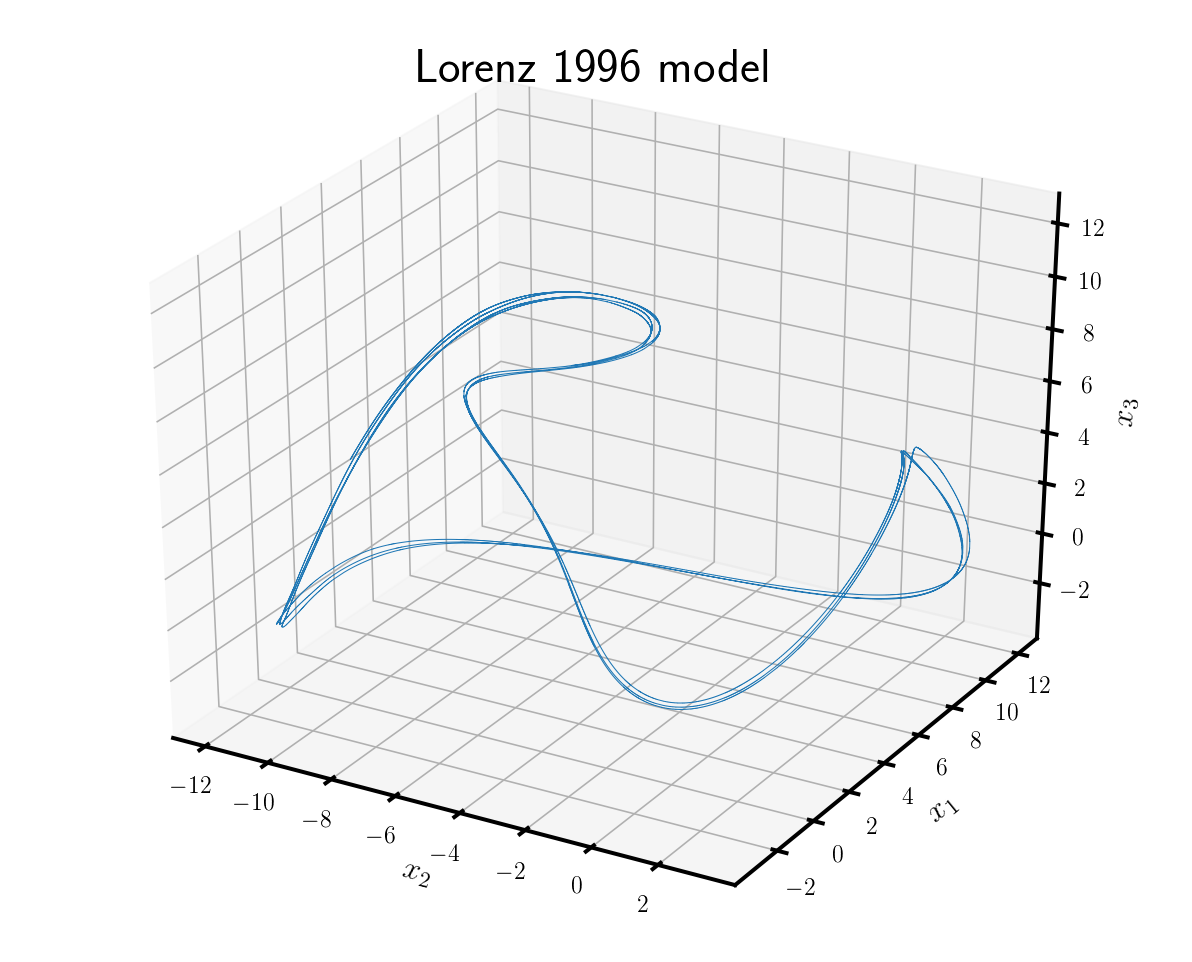

In [29]:
fig = plt.figure(figsize=(10,8))
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d')
ax.plot(-x2[380000:600000], x1[380000:600000], x3[380000:600000],lw=0.5)
ax.set_xlabel("$x_2$")
ax.set_ylabel("$x_1$")
#plt.xlim(4, -12)
ax.set_zlabel("$x_3$")
ax.set_title("Lorenz 1996 model")
plt.show()

In [52]:
print(x1)

[0.04288581 0.04398592 0.04398592 ... 0.68302647 0.68302647 0.68302647]


In [31]:
LE = np.zeros((Jmax-4,Imax-4))
print(LE)
print(LE[51,])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [59]:
ma=np.array([[1,2,3],[4,5,6],[7,8,9]])
print(ma)
print(len(ma[2]))
ma[2][0]

[[1 2 3]
 [4 5 6]
 [7 8 9]]
3


7

In [49]:
LE = np.zeros((Jmax-4,Imax-4))
print(len(LE[0]))

47


In [ ]:
LEcalc(f,Df,x(:,end))  # call

function [LE] = LEcalc(f,Df, v0) #def

In [ ]:
LEcalc(f,Df,x(:,end))  # call

function [LE] = LEcalc(f,Df, v0) #def

f = @(x,par) [par(1)*(x(2)-x(1));
              par(2)*x(1)-x(2)-x(1)*x(3);
              x(1)*x(2)-par(3)*x(3)];

Df = @(x,par) [-par(1),par(1),0;
        par(2)-x(3),-1,-x(1);
        x(2),x(1),-par(3)];

In [56]:
m = len(x1)
N = 10000
LE = np.zeros(m)
v = x1

In [ ]:
xylist = np.zeros([(totstep)*(I+J*I)])

In [ ]:
def J4LE(xy,i,j):   
    
    #xy_dot[i] = (xy[0:I][(i-1)%I] * (xy[0:I][(i+1)%I] - xy[0:I][(i-2)%I]) - xy[0:I][i%I] + F - h*c/b*(np.sum([xy[I::][i::I]])))   

    xyjj[:I*I][(0+i+I*i)%(I*I)] = (xy[0:I][(i-1)%I] * (xy[0:I][(i+1)%I] - xy[0:I][(i-2)%I]) - 1 + F - h*c/b*(np.sum([xy[I::][i::I]])))  #对角 
    
    xyjj[:I*I][(i+I*i)%(I*I)] = (xy[0:I][(i+1)%I] - xy[0:I][(i-2)%I]) - xy[0:I][i%I] + F - h*c/b*(np.sum([xy[I::][i::I]])) #对角下一个
    
    xyjj[:I*I][(i+I*i)%(I*I)] = (xy[0:I][(i-1)%I] * xy[0:I][(i+1)%I] -  xy[0:I][(i-2)%I]) - xy[0:I][i%I] + F - h*c/b*(np.sum([xy[I::][i::I]])) # 对角上两个   
    
    xyjj[:I*I][(i+I*i)%(I*I)] = (xy[0:I][(i-1)%I] - xy[0:I][(i-1)%I] * xy[0:I][(i-2)%I]) - xy[0:I][i%I] + F - h*c/b*(np.sum([xy[I::][i::I]])) # 对角上一个
    
    xyjj[I*I+j*I+i] = (c*b*xy[I:][((j+1)%J)*I+i]*(xy[I:][((j-1)%J)*I+i]-xy[I:][((j+2)%J)*I+i])-c*xy[I:][((j)%J)*I+i]+h*c/b  #j 里的 y



In [72]:
ll=[1,3,5,7,9,11,13,15]
print(len(ll))
print(ll[7])
print(ll[:4])
print(ll[0:10])  #不包括最后一个

8
15
[1, 3, 5, 7]
[1, 3, 5, 7, 9, 11, 13, 15]


In [ ]:
def RK4(xylist,step,i,j):
    
    oldxy = xylist[((I+J*I)*(step-1)):((I+J*I)*(step))]

    k1 = dt*lorenz96(oldxy,i,j)
    k2 = dt*lorenz96(oldxy + k1*0.5*dt,i,j)
    k3 = dt*lorenz96(oldxy + k2*0.5*dt,i,j)
    k4 = dt*lorenz96(oldxy + k3*dt,i,j)

    return oldxy + (k1 + 2*k2 + 2*k3 + k4)/6

In [ ]:
def LEcalc(x1):
    
    q = np.zeros((m,m))
    np.fill_diagonal(JJ, 1)
    
    JJ= np.np.zeros((I,I))
    
    JJ=J4LE(xy,i,j):  
    
    Jt = @(x,A) A*x; % ode for DF1, 'A' will be current Df

    for i in rang(N):
        
        DF1 = eye(m); % initialize derivative of time-1 map
        
    
    
        for tt in range(1/dt):
    
            
            % one timestep using RK4
            DF1 = stepit(Jt,DF1,Df(v,param),tstep);	% 3 x 3 matrix
            
            v = stepit(f,v,param,tstep);
        end
        Z = DF1*q;
        [q,r] = qr(Z);
        LE = LE + log(abs(diag(r)))/N;
    end
    %LE = LE/N;


In [50]:
LE = np.zeros((Jmax-4,Imax-4))

for II in np.arange(4,Imax,1):
    for JJ in np.arange(8,Jmax,1):


        JJ = np.zeros((II,II))
        #JACOBIAN JJ filled up by J4LE(xy,i,j) 
        
        #np.fill_diagonal(JJ, -1)
        
      
        q = np.ones((I,I))
    
        #for step in np.arange(1,n,1):
            newxx = newx[(step-1)*I:]
    
            for iii in range(I):
                JJ[(iii+1)%I,iii%I] = (newxx[(iii+1)%I]-newxx[(iii-2)%I])
                JJ[iii%I,(iii+1)%I] = (newxx[(iii-1)%I])
                JJ[iii%I,(iii-2)%I] = (-newxx[(iii-1)%I])
            Jtot = Jtot + JJ
                
        Z = Jtot*q
        [q,r] = np.linalg.qr(Z)
        LE[J-4,I-4]= np.log(np.amax(np.absolute(np.diag(r))))/(Imax-4)
        #print(absdiagr)
        #LE[J-4,I-4] = np.log(np.absolute(np.diag(r)))/(Imax-4)
print(LE)          
plt.imshow(LE, cmap=plt.cm.jet)
cb = plt.colorbar(label='LE', pad=0.1)
plt.axes().set_aspect('equal')
plt.show()

IndentationError: unexpected indent (<ipython-input-50-bf3d8542f2be>, line 13)

In [ ]:
LE = np.zeros((Jmax-4,Imax-4))

for II in np.arange(4,Imax,1):
    for JJ in np.arange(8,Jmax,1):


        JJ = np.zeros((II,II))
        #JACOBIAN JJ filled up by J4LE(xy,i,j) 
        
        #np.fill_diagonal(JJ, -1)
        
        Jtot = np.zeros((II,II))
        
        q = np.ones((I,I))
    
        #for step in np.arange(1,n,1):
            newxx = newx[(step-1)*I:]
    
            for iii in range(I):
                JJ[(iii+1)%I,iii%I] = (newxx[(iii+1)%I]-newxx[(iii-2)%I])
                JJ[iii%I,(iii+1)%I] = (newxx[(iii-1)%I])
                JJ[iii%I,(iii-2)%I] = (-newxx[(iii-1)%I])
            Jtot = Jtot + JJ
                
        Z = Jtot*q
        [q,r] = np.linalg.qr(Z)
        LE[J-4,I-4]= np.log(np.amax(np.absolute(np.diag(r))))/(Imax-4)
        #print(absdiagr)
        #LE[J-4,I-4] = np.log(np.absolute(np.diag(r)))/(Imax-4)
print(LE)          
plt.imshow(LE, cmap=plt.cm.jet)
cb = plt.colorbar(label='LE', pad=0.1)
plt.axes().set_aspect('equal')
plt.show()